# AirBnB Bangko

# Latar Belakang
AirBnB merupakan perusahaan digital yang bergerak di bidang Travel agent, pertumbuhana era digital yang pesat mengharuskan AirBnB untuk dapat bersaing dalam industri ini, AirBnB tidak bergerak sendiri. Persaingan semakin ketat dengan munculnya perusahaan serupa seperti Traveloka dan Tiket.com, yang juga menawarkan layanan yang memadukan teknologi dan hospitalitas. Kedua perusahaan ini, bersama dengan pesaing lain, telah membentuk sebuah arena kompetitif yang mengharuskan Airbnb untuk tidak hanya berinovasi tetapi juga terus meningkatkan kualitas layanan mereka.

# Rumusan Masalah
Pertumbuhan yang pesat pada industri ini tidak lepas dari tantangan persaingan perusahaan digital lain, dalam segi bisnis kita berusaha untuk dapat menaikan income atau dan pengguna dari airbnb.

Masalahnya adalah bagaimana perusahaan bisa memperoleh peningkatan pendapatan perusahaan atau growth income dan menarik pengguna lebih banyak, sehingga perusahaan tetap dapat bersaing dengan perusahaan sejenis lainnya.

Sebagai seorang data analyst, saya akan mencoba untuk membantu dengan memberikan rekomendasi action terbaik berdasarkan data yang saya punya, untuk meningkatkan daya saing perusahaan yang bisa di pertimbangkan para pembuat keputusan untuk membuat keputusan yang lebih baik.

* 1. mengedepankan penawaran harga terbaik pada pengguna untuk meningkatkan minat pengguna.
* 2. menawarkan layanan promosi berbayar kepada mitra penginapan untuk membantu mempromosikan penginapannya yang masih kurang peminat.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Data
Dataset yang di gunakan merupakan data yang saya peroleh dari purwadhika "Airbnb Listing bangkok" yang merupakan dataset penginapan yang terdapat di bangkok thailand.

Dataset ini memiliki informasi seputar nama properti yang beraffiliasi dengan airbnb, pemilik properti, lokasi, tipe ruangan, harga hingga review dari pengguna.

* id : id adalah nilai unik untuk setiap properti yang terdapat dalam dataset
* name : adalah nama penginapan atau properti
* host id : nilai unik dari pemilik properti
* host_name : nama pemilik properti
* neighbourhood : adalah nama lokasi properti berada
* latitude : garis bujur vertikal
* longitude : garis bujur melintang
* roomtype : tipe ruangan
* price : harga dalam mata uang lokal atau baht
* minimum_night : masa minimum menginap
* number_of_reviews : jumlah ulasan yang di berikan.
* last_review : tanggal review terakhir
* reviews per month : jumlah ulasan per bulan
* availability_365 : ketersedian hari
* number_of_reviews_ltm : review dalam 12 bulan terakhir

In [3]:
df = pd.read_csv("C:/database_sql/DB/AirbnbListingsBangkok.csv")
display(df.head(3), df.tail(3))

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.5,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


# Data Understanding and Cleaning

untuk menganalisi data kita akan perlu memahami dataset jumlah baris, kolom tipe data yang akan kita tangani pada tahap Data Cleaning

mari kita lihat informasinya

In [4]:
print("Baris dan kolom {}".format(df.shape))
df.info()

Baris dan kolom (15854, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15854 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last

In [5]:
display(df.describe(), df.describe(include='object'))

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15854,15854,15854,10064
unique,14794,5313,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [6]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [7]:
pd.set_option('display.max_colwidth', -1)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

C:\Users\Acer\AppData\Local\Temp\ipykernel_22740\3657208298.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,15854,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
2,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel roo

# Informasi yang di dapat

* 1. dataset terdiri dari 15854 baris dan 17 kolom.
* 2. berdasarkan data uniknya subjek yang di analysis meliputi `14.749 properti`, `5.313 pemilik properti`, `50 kota` dan `4 jenis tipe ruangan`
* 3. pada kolom `room_type` terdapat 4 tipe ruangan terdiri dari (`Entire home/apt`, `hotel room`, `privated room` & `shared room`)
* 4. rata-rata yang di peroleh untuk minimum penyewaan adalah `15 malam`
* 5. terdapat data pada kolom `price` untuk kita bisa menentukan rekomendasi terbaik kepada pelanggan
* 6. pada saat kita mencoba melihat ringkasan statistik dari dataset di atas dapat kita lihat minimum pada kolom `price` adalah 0, maka berarti terdapat baris dimana seseorang tidak memberikan harga pada penginapannya maka data tersebut harus di hapus.  

# Missing Value

In [8]:
display(df.isna().sum(),df.isna().sum()/df.shape[0]*100 ) 

Unnamed: 0                        0   
id                                0   
name                              8   
host_id                           0   
host_name                         0   
neighbourhood                     0   
latitude                          0   
longitude                         0   
room_type                         0   
price                             0   
minimum_nights                    0   
number_of_reviews                 0   
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count    0   
availability_365                  0   
number_of_reviews_ltm             0   
dtype: int64

Unnamed: 0                        0.000000 
id                                0.000000 
name                              0.050460 
host_id                           0.000000 
host_name                         0.000000 
neighbourhood                     0.000000 
latitude                          0.000000 
longitude                         0.000000 
room_type                         0.000000 
price                             0.000000 
minimum_nights                    0.000000 
number_of_reviews                 0.000000 
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count    0.000000 
availability_365                  0.000000 
number_of_reviews_ltm             0.000000 
dtype: float64

# Missing Value
missing value atau data kosong terdapat pada `name`, `last_review`, `review_per_month`

* 1. pada kolom `name` ini merupakan data nama penginapan masalahnya adalah kita tidak bisa merokemendasikan jika nama tempatnya tidak di ketahui, data tersebut tidak dapat di gantikan karena tidak bisa di prediksi, di karena kan jumlahnya tidak terlalu banyak dan hanya di bawah 1 persen dari keseluruhan dataset maka di sini data dapat menghapusnya.
 
 * 2. pada kolom `last_review` &, `review_per_month` terdapat jumlah data kosong yang sama, dapat di asumsikan bahwa penginapan terkait belum memiliki review sama sekali, ini bisa terjadi mungkin karena belum ada pengguna yang memutuskan untuk menginap di tempat tersebut atau bahkan tempat tersebut belum pernah di sewa, hal ini lumrah dalam usaha sehingga data kosong ini akan di biarkan, terlebih data tidak dapat di ganti perihal kredibilitas data, dan data juga tidak mungkin di hapus karena persentase yang cukup besar di angka 36 persen jika di hapus di takutkan akan mempengaruhi keakuratan analysis data yang lainnya.

In [9]:
df = df.dropna(thresh=15)

In [10]:
df.isna().sum()

Unnamed: 0                        0   
id                                0   
name                              2   
host_id                           0   
host_name                         0   
neighbourhood                     0   
latitude                          0   
longitude                         0   
room_type                         0   
price                             0   
minimum_nights                    0   
number_of_reviews                 0   
last_review                       5784
reviews_per_month                 5784
calculated_host_listings_count    0   
availability_365                  0   
number_of_reviews_ltm             0   
dtype: int64

masih terdapat 2 missing value di name mari kita cek kedua data set tersebut.

In [11]:
df[df['name'].isna()].head(2)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1282,1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
2075,2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [12]:
df = df.drop([1282, 2075])

In [13]:
df.isna().sum()

Unnamed: 0                        0   
id                                0   
name                              0   
host_id                           0   
host_name                         0   
neighbourhood                     0   
latitude                          0   
longitude                         0   
room_type                         0   
price                             0   
minimum_nights                    0   
number_of_reviews                 0   
last_review                       5784
reviews_per_month                 5784
calculated_host_listings_count    0   
availability_365                  0   
number_of_reviews_ltm             0   
dtype: int64

Missing value pada name telah di hapus.

kita juga perlu menghapus data dari baris price yang memiliki nilai 0

In [14]:
df.loc[df['price'] == 0].index

Int64Index([11103], dtype='int64')

In [15]:
df = df.drop([11103])

In [16]:
print("Baris dan kolom {}".format(df.shape))
df.info()

Baris dan kolom (15845, 17)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15845 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15845 non-null  int64  
 1   id                              15845 non-null  int64  
 2   name                            15845 non-null  object 
 3   host_id                         15845 non-null  int64  
 4   host_name                       15845 non-null  object 
 5   neighbourhood                   15845 non-null  object 
 6   latitude                        15845 non-null  float64
 7   longitude                       15845 non-null  float64
 8   room_type                       15845 non-null  object 
 9   price                           15845 non-null  int64  
 10  minimum_nights                  15845 non-null  int64  
 11  number_of_reviews               15845 non-null  int64  
 12  last

In [22]:
df.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15845.000000,1.584500e+04,1.584500e+04,15845.000000,15845.000000,1.584500e+04,15845.000000,15845.000000,10062.000000,15845.000000,15845.000000,15845.000000
mean,7929.783717,1.580294e+17,1.541504e+08,13.745150,100.559899,3.218668e+03,15.300032,16.663111,0.813297,13.896813,244.342316,3.483496
std,4575.385419,2.946611e+17,1.318743e+08,0.043044,0.050918,2.497916e+04,50.828420,40.623100,1.090251,30.276935,125.838296,8.919083
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,2.780000e+02,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3969.000000,2.104513e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7930.000000,3.504876e+07,1.224556e+08,13.738490,100.561400,1.429000e+03,1.000000,2.000000,0.440000,4.000000,309.000000,0.000000
75%,11892.000000,5.258780e+07,2.390991e+08,13.759500,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


In [23]:
df.to_excel('FixAirBnBListingBangkok.xlsx', index=False)

Sekarang tersisa 15845 baris setelah di hapus & juga minimum pada price tidak lagi nol

# Data Analysis

Data Cleaning telah di lakukan, kita bisa melanjutkan ke tahap analisis, analisis yang di cari

# 1. pada kolom price dan  yang sudah kita lihat dapat kita gunakan untuk mencari tahu harga terbaik yang bisa kita tawarkan pada pengguna.

Untuk Analisis harga saya mempertimbangkan dari segi pirce, neighbourhood, type room, number of review dan review per mounth sebagain acuan, kita asumsikan penginapan dengan review terbanyak serta review per mounth sebagai penginapan yang memiliki reputasi yang baik, analisis menggunakan deskriptif statistic. 

sebenarnya terdapat minimum penyewaan pada masing-masing penginapan sehingga biaya minimum yang harus di keluarkan bisa jadi lebih dari yang di asumsikan, tapi saya akan mencoba untuk membandingkannya jika terhitung harga untuk satu malam, perhitungan di kelompokan berdasarkan type roomnya dan lokasi, tentu standar harganya berbeda.

In [18]:
neighbourhood_reviews = df.groupby('neighbourhood')['number_of_reviews'].sum().reset_index()

sorted_neighbourhoods = neighbourhood_reviews.sort_values('number_of_reviews', ascending=False)

display(sorted_neighbourhoods.head(),sorted_neighbourhoods.tail()) 

,neighbourhood,number_of_reviews
22,Khlong Toei,41279
47,Vadhana,37415
41,Sathon,22242
37,Ratchathewi,20692
18,Huai Khwang,18145


,neighbourhood,number_of_reviews
46,Thung khru,22
44,Thawi Watthana,11
27,Nong Chok,4
28,Nong Khaem,1
0,Bang Bon,1


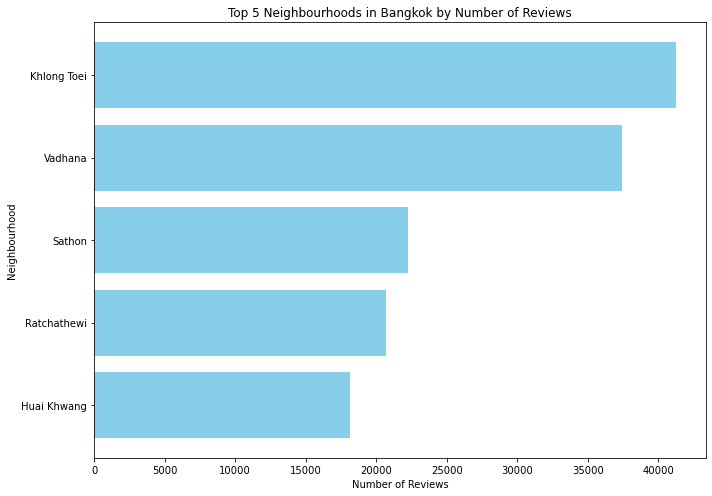

In [19]:
top_neighbourhoods = sorted_neighbourhoods.head()

plt.figure(figsize=(10, 7))
plt.barh(top_neighbourhoods['neighbourhood'][::-1], top_neighbourhoods['number_of_reviews'][::-1], color='skyblue')


plt.ylabel('Neighbourhood')
plt.xlabel('Number of Reviews')
plt.title('Top 5 Neighbourhoods in Bangkok by Number of Reviews')
plt.tight_layout() 

plt.show()

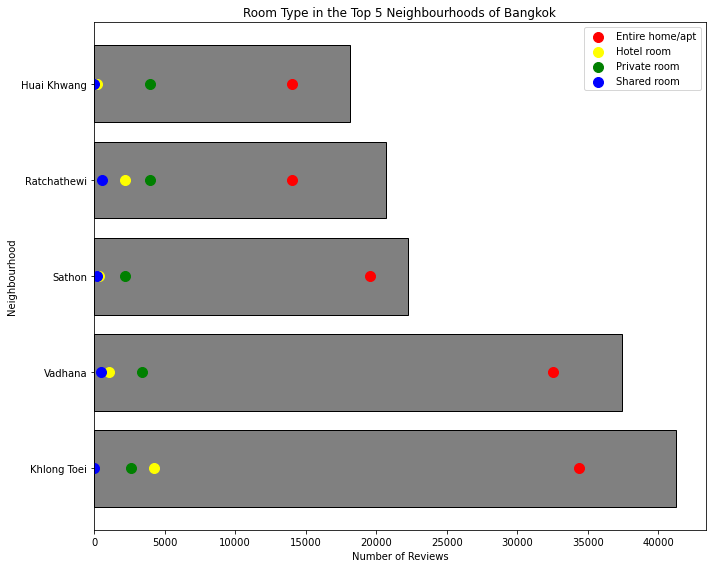

In [21]:
neighbourhood_reviews = df.groupby('neighbourhood')['number_of_reviews'].sum().reset_index()
top_neighbourhoods = sorted_neighbourhoods.head() 

top_neighbourhood_names = top_neighbourhoods['neighbourhood']
top_neighbourhood_data = df[df['neighbourhood'].isin(top_neighbourhood_names)]
room_type_reviews = top_neighbourhood_data.groupby(['neighbourhood', 'room_type'])['number_of_reviews'].sum().reset_index()

sorted_room_type_reviews = room_type_reviews.sort_values('number_of_reviews', ascending=False)

plt.figure(figsize=(10, 8))
colors = {'Entire home/apt': 'red', 'Private room': 'green', 'Shared room': 'blue', 'Hotel room': 'yellow'}

for neighbourhood in top_neighbourhood_names:
    total_reviews = top_neighbourhood_data[top_neighbourhood_data['neighbourhood'] == neighbourhood]['number_of_reviews'].sum()
    plt.barh(neighbourhood, total_reviews, color='grey', edgecolor='black')

for _, row in sorted_room_type_reviews.iterrows():
    plt.scatter(row['number_of_reviews'], row['neighbourhood'], color=colors[row['room_type']], label=row['room_type'], s=100)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.xlabel('Number of Reviews')
plt.ylabel('Neighbourhood')
plt.title('Room Type in the Top 5 Neighbourhoods of Bangkok')
plt.tight_layout()
plt.show()

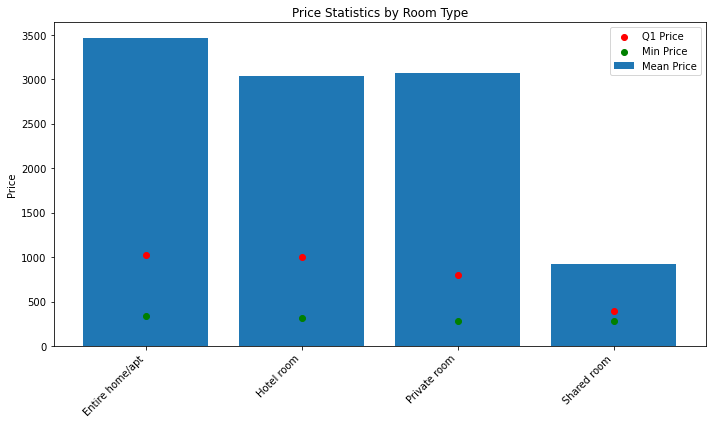

In [33]:
grouped_by_room_type = df.groupby('room_type')

room_type_stats = grouped_by_room_type['price'].agg(['mean', lambda x: np.percentile(x, 25), 'min']).reset_index()
room_type_stats.columns = ['Room Type', 'Mean Price', 'Q1 Price', 'Min Price']

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(room_type_stats['Room Type'], room_type_stats['Mean Price'], label='Mean Price')

ax.scatter(room_type_stats['Room Type'], room_type_stats['Q1 Price'], color='red', label='Q1 Price', zorder=5)
ax.scatter(room_type_stats['Room Type'], room_type_stats['Min Price'], color='green', label='Min Price', zorder=5)

ax.legend()

plt.xticks(rotation=45, ha='right')
plt.ylabel('Price')
plt.title('Price Statistics by Room Type')
plt.tight_layout()

plt.show()

# 2. menganalisis kemungkinan bisnis layanan promosi pada mitra yang sepi peminat.

Analisis menggunakan deskriptif statistic dimana kita bisa mempersentasikan perbandingan penginapan yang belum memiliki penyewa sama sekali dengan keseluruhan dataset berdasarkan kolom number_of_reviewnya. 

In [59]:
print("terdapat {} calon pengguna layanan promosi berbayar ".format(df.loc[df['number_of_reviews'] == 0].shape))

terdapat (5783, 17) calon pengguna layanan promosi berbayar 


In [47]:
jumlah_Calon_layanan = df[df['number_of_reviews'] == 0].shape[0]
jumlah_total = df.shape[0]
persentase_tanpa_review = (jumlah_Calon_layanan / jumlah_total) * 100
print(f"Persentase target: {persentase_tanpa_review:.2f}%")

Persentase target: 36.50%


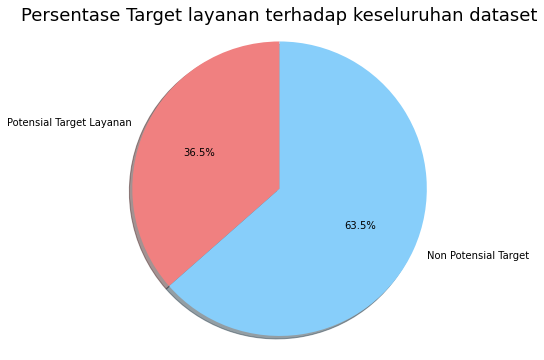

In [61]:
persentase_tanpa_review = (jumlah_Calon_layanan / jumlah_total) * 100
persentase_dengan_review = 100 - persentase_tanpa_review

sizes = [persentase_tanpa_review, persentase_dengan_review]
labels = ['Potensial Target Layanan', 'Non Potensial Target']
colors = ['lightcoral', 'lightskyblue']   

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')  
plt.title('Persentase Target layanan terhadap keseluruhan dataset', fontsize=18, color='black')

plt.show()

Dari hasil visualisasi piechart serta jumlah nya, sebesar 36.5% penginapan yang ada di AirBnB bangkok belum memiliki pengunjung jumlah ini bahkan di atas ambang bawah Q1, prospek layanan promosi ini berkemungkinan untuk memajukan usaha pemiliki penginapan, di lain sisi kita bisa memperoleh keuntungan dari jasa promosi yang kita tawarkan.  

# Kesimpulan

* 1. kota paling banyak di kunjungi adalah Khlong Toei & Vadhana.
* 2. tipe ruangan yang paling banyak di minati adalah Enitre home/apt.
* 3. sebanyak 36.5% properti yang ada di dataset belum pernah di sewa.